In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.DataFrame({'x':(1.38, 6.93, 7.7, 11.5, 12.88), 'y':(2.45, 3.73, 9.74, 6.34, 10.46)})
df

,x,y
0,1.38,2.45
1,6.93,3.73
2,7.70,9.74
3,11.50,6.34
4,12.88,10.46


In [3]:
m,b = 0.9,1

In [4]:
df['y_pred'] = m * df['x'] + b
df

,x,y,y_pred
0,1.38,2.45,2.242
1,6.93,3.73,7.237
2,7.70,9.74,7.930
3,11.50,6.34,11.350
4,12.88,10.46,12.592


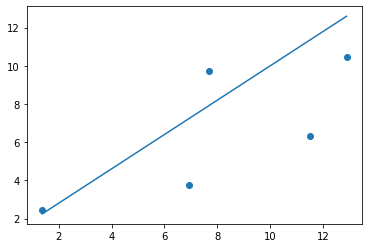

In [5]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])

In [6]:
df['squared_error'] = (df['y'] - df['y_pred'])**2
df

,x,y,y_pred,squared_error
0,1.38,2.45,2.242,0.043264
1,6.93,3.73,7.237,12.299049
2,7.70,9.74,7.930,3.276100
3,11.50,6.34,11.350,25.100100
4,12.88,10.46,12.592,4.545424


In [7]:
df['squared_error'].mean()

9.0527874

In [8]:
df['m_derivative'] = -(-2*df['x']*(-b-m*df['x']+df['y']))
df

,x,y,y_pred,squared_error,m_derivative
0,1.38,2.45,2.242,0.043264,0.57408
1,6.93,3.73,7.237,12.299049,-48.60702
2,7.70,9.74,7.930,3.276100,27.87400
3,11.50,6.34,11.350,25.100100,-115.23000
4,12.88,10.46,12.592,4.545424,-54.92032


In [9]:
df['b_derivative'] = -(-2*(-m*df['x']+df['y']-b))
df

,x,y,y_pred,squared_error,m_derivative,b_derivative
0,1.38,2.45,2.242,0.043264,0.57408,0.416
1,6.93,3.73,7.237,12.299049,-48.60702,-7.014
2,7.70,9.74,7.930,3.276100,27.87400,3.620
3,11.50,6.34,11.350,25.100100,-115.23000,-10.020
4,12.88,10.46,12.592,4.545424,-54.92032,-4.264


In [10]:
df['m_derivative'].mean()

-38.061852

In [11]:
df['b_derivative'].mean()

-3.4524

In [12]:
learning_rate = 0.001

In [13]:
m = m + learning_rate * df['m_derivative'].mean()
b = b + learning_rate * df['b_derivative'].mean()

In [14]:
m,b

(0.861938148, 0.9965476)

In [15]:
df['y_pred'] = m * df['x'] + b

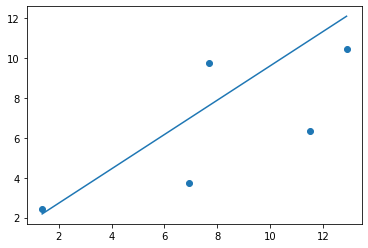

In [16]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])

In [17]:
df['squared_error'] = (df['y'] - df['y_pred'])**2

In [18]:
df['squared_error'].mean()

7.712328581973784

In [19]:
df

,x,y,y_pred,squared_error,m_derivative,b_derivative
0,1.38,2.45,2.186022,0.069684,0.57408,0.416
1,6.93,3.73,6.969779,10.496168,-48.60702,-7.014
2,7.70,9.74,7.633471,4.437463,27.87400,3.620
3,11.50,6.34,10.908836,20.874265,-115.23000,-10.020
4,12.88,10.46,12.098311,2.684063,-54.92032,-4.264


<ipython-input-24-3a2e008c0924>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_auto['y_pred'] = m * df_auto['x'] + b
<ipython-input-24-3a2e008c0924>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_auto['m_derivative'] = -(-2*df_auto['x']*(-b-m*df_auto['x']+df_auto['y']))
<ipython-input-24-3a2e008c0924>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

4.477676818138322


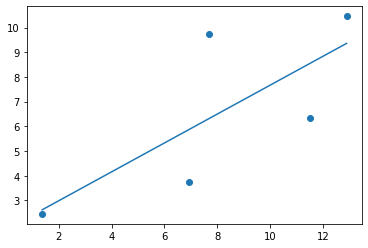

In [24]:
df_auto = df[['x','y']]
m,b = 15, 23
n = 10000
learning_rate = 0.01
df_auto['y_pred'] = m * df_auto['x'] + b

for i in range(n):
    df_auto['m_derivative'] = -(-2*df_auto['x']*(-b-m*df_auto['x']+df_auto['y']))
    df_auto['b_derivative'] = -(-2*(-m*df_auto['x']+df_auto['y']-b))
    m = m + learning_rate * df_auto['m_derivative'].mean()
    b = b + learning_rate * df_auto['b_derivative'].mean()

    df_auto['y_pred'] = m * df_auto['x'] + b
    df_auto['squared_error'] = (df_auto['y'] - df_auto['y_pred'])**2
print(df_auto['squared_error'].mean())

plt.scatter(df_auto['x'], df_auto['y'])
plt.plot(df_auto['x'], df_auto['y_pred'])